In [110]:
# 데이터 준비

import pandas as pd
import folium

import matplotlib.font_manager as fm # 한글폰트
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp # 마이너스 설정
mlp.rcParams["axes.unicode_minus"] = False


In [6]:
car_f=pd.read_csv("C:\ww\Team_middle_project\data\자동차+등록현황(연료별)_20221025141634.csv")
car_f

,차종별(1),차종별(2),연료별(1),연료별(2),2017. 01,2017. 02,2017. 03,2017. 04,2017. 05,2017. 06,...,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11,2021. 12
0,계,소계,계,소계,3091903,3093930,3095613,3099256,3103357,3107935,...,3158710,3159075,3160629,3162985,3171767,3171749,3175142,3173961,3177236,3176743
1,계,소계,계,휘발유,1600398,1600615,1601053,1602253,1602947,1604293,...,1636698,1638511,1639303,1640427,1645752,1645085,1646093,1645282,1646122,1646141
2,계,소계,계,경유,1112698,1115138,1116960,1119341,1122534,1124890,...,1103183,1099842,1098086,1096347,1097562,1095411,1093923,1090545,1088003,1084741
3,계,소계,계,LPG,316770,315472,313836,312680,311467,310323,...,255058,253828,252577,251488,250361,248869,247928,246873,245825,245041
4,계,소계,계,전기,1589,1649,1692,1714,1932,2327,...,24918,25581,27013,28752,29325,31220,33434,35067,38840,40564
5,계,소계,계,CNG,9839,9834,9839,9833,9822,9810,...,9073,9057,9055,9047,9031,9020,9012,9008,8977,8887
6,계,소계,계,하이브리드,45818,46413,47370,48524,49693,51254,...,121605,123833,125997,128223,130930,133203,135667,137938,140097,141889
7,계,소계,계,기타,4779,4796,4850,4898,4949,5025,...,6478,6536,6584,6664,6753,6832,6888,6963,6989,7035
8,계,소계,계,수소,12,13,13,13,13,13,...,1697,1887,2014,2037,2053,2109,2197,2285,2383,2445
9,계,승용차,계,소계,2607254,2610151,2612587,2616911,2621670,2627009,...,2715453,2717185,2719601,2722462,2731730,2732495,2736668,2736546,2739979,2740044


In [8]:
# column에 NaN 이쓴 경우 다른 값으로 대체한 후 Type 변경 가능
# - 표시된 값
#car_f[car_f["2017. 01"] == "-"]
# '-' 제외
car_f1 = car_f[car_f[:] != '-']
# '-', NaN 제외
car_f2 = car_f1.dropna()
car_f2

,차종별(1),차종별(2),연료별(1),연료별(2),2017. 01,2017. 02,2017. 03,2017. 04,2017. 05,2017. 06,...,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11,2021. 12
0,계,소계,계,소계,3091903,3093930,3095613,3099256,3103357,3107935,...,3158710,3159075,3160629,3162985,3171767,3171749,3175142,3173961,3177236,3176743
1,계,소계,계,휘발유,1600398,1600615,1601053,1602253,1602947,1604293,...,1636698,1638511,1639303,1640427,1645752,1645085,1646093,1645282,1646122,1646141
2,계,소계,계,경유,1112698,1115138,1116960,1119341,1122534,1124890,...,1103183,1099842,1098086,1096347,1097562,1095411,1093923,1090545,1088003,1084741
3,계,소계,계,LPG,316770,315472,313836,312680,311467,310323,...,255058,253828,252577,251488,250361,248869,247928,246873,245825,245041
4,계,소계,계,전기,1589,1649,1692,1714,1932,2327,...,24918,25581,27013,28752,29325,31220,33434,35067,38840,40564
5,계,소계,계,CNG,9839,9834,9839,9833,9822,9810,...,9073,9057,9055,9047,9031,9020,9012,9008,8977,8887
6,계,소계,계,하이브리드,45818,46413,47370,48524,49693,51254,...,121605,123833,125997,128223,130930,133203,135667,137938,140097,141889
7,계,소계,계,기타,4779,4796,4850,4898,4949,5025,...,6478,6536,6584,6664,6753,6832,6888,6963,6989,7035
8,계,소계,계,수소,12,13,13,13,13,13,...,1697,1887,2014,2037,2053,2109,2197,2285,2383,2445
9,계,승용차,계,소계,2607254,2610151,2612587,2616911,2621670,2627009,...,2715453,2717185,2719601,2722462,2731730,2732495,2736668,2736546,2739979,2740044


In [303]:
car_f2.isnull().sum()

차종별(1)      0
차종별(2)      0
연료별(1)      0
연료별(2)      0
2017. 01    0
           ..
2021. 08    0
2021. 09    0
2021. 10    0
2021. 11    0
2021. 12    0
Length: 64, dtype: int64

In [10]:
df = pd.DataFrame({"연료별":car_f2["연료별(2)"],
                  "2017년 1월":car_f2["2017. 01"],
                  "2017년 12월" : car_f2["2017. 12"],
                  "2018년 1월":car_f2["2018. 01"],
                  "2018년 12월":car_f2["2018. 12"],
                   "2019년 1월":car_f2["2019. 01"],
                  "2019년 12월": car_f2["2019. 12"],
                  "2020년 1월":car_f2["2020. 01"],
                  "2020년 12월":car_f2["2020. 12"],
                   "2021년 1월":car_f2["2021. 01"],
                  "2021년 12월": car_f2["2021. 12"]
                  })
df
df[:9]


,연료별,2017년 1월,2017년 12월,2018년 1월,2018년 12월,2019년 1월,2019년 12월,2020년 1월,2020년 12월,2021년 1월,2021년 12월
0,소계,3091903,3116256,3118469,3124651,3128420,3124157,3127566,3157361,3159552,3176743
1,휘발유,1600398,1600270,1601123,1592471,1593540,1607915,1609709,1634867,1636281,1646141
2,경유,1112698,1135239,1136859,1147787,1150483,1121920,1122681,1108287,1107835,1084741
3,LPG,316770,301546,299911,284328,282789,271977,271250,258444,257262,245041
4,전기,1589,4797,4851,9564,9571,14952,15353,23393,23441,40564
5,CNG,9839,9731,9722,9635,9627,9441,9429,9114,9112,8887
6,하이브리드,45818,59431,60735,75178,76718,91505,92676,115280,117578,141889
7,기타,4779,5229,5255,5604,5610,5848,5865,6305,6324,7035
8,수소,12,13,13,84,82,599,603,1671,1719,2445


In [116]:
df1=df[1:9]
df1

,연료별,2017년 1월,2017년 12월,2018년 1월,2018년 12월,2019년 1월,2019년 12월,2020년 1월,2020년 12월,2021년 1월,2021년 12월
1,휘발유,1600398,1600270,1601123,1592471,1593540,1607915,1609709,1634867,1636281,1646141
2,경유,1112698,1135239,1136859,1147787,1150483,1121920,1122681,1108287,1107835,1084741
3,LPG,316770,301546,299911,284328,282789,271977,271250,258444,257262,245041
4,전기,1589,4797,4851,9564,9571,14952,15353,23393,23441,40564
5,CNG,9839,9731,9722,9635,9627,9441,9429,9114,9112,8887
6,하이브리드,45818,59431,60735,75178,76718,91505,92676,115280,117578,141889
7,기타,4779,5229,5255,5604,5610,5848,5865,6305,6324,7035
8,수소,12,13,13,84,82,599,603,1671,1719,2445


In [177]:
df2 = df1.set_index(["연료별"]).astype(float)
df2

,2017년 1월,2017년 12월,2018년 1월,2018년 12월,2019년 1월,2019년 12월,2020년 1월,2020년 12월,2021년 1월,2021년 12월
연료별,,,,,,,,,,
휘발유,1600398.0,1600270.0,1601123.0,1592471.0,1593540.0,1607915.0,1609709.0,1634867.0,1636281.0,1646141.0
경유,1112698.0,1135239.0,1136859.0,1147787.0,1150483.0,1121920.0,1122681.0,1108287.0,1107835.0,1084741.0
LPG,316770.0,301546.0,299911.0,284328.0,282789.0,271977.0,271250.0,258444.0,257262.0,245041.0
전기,1589.0,4797.0,4851.0,9564.0,9571.0,14952.0,15353.0,23393.0,23441.0,40564.0
CNG,9839.0,9731.0,9722.0,9635.0,9627.0,9441.0,9429.0,9114.0,9112.0,8887.0
하이브리드,45818.0,59431.0,60735.0,75178.0,76718.0,91505.0,92676.0,115280.0,117578.0,141889.0
기타,4779.0,5229.0,5255.0,5604.0,5610.0,5848.0,5865.0,6305.0,6324.0,7035.0
수소,12.0,13.0,13.0,84.0,82.0,599.0,603.0,1671.0,1719.0,2445.0


In [178]:
#print(car_f)
#car_f.info() # object니까 바꿔주기
df2.info()
#df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 휘발유 to 수소
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2017년 1월   8 non-null      float64
 1   2017년 12월  8 non-null      float64
 2   2018년 1월   8 non-null      float64
 3   2018년 12월  8 non-null      float64
 4   2019년 1월   8 non-null      float64
 5   2019년 12월  8 non-null      float64
 6   2020년 1월   8 non-null      float64
 7   2020년 12월  8 non-null      float64
 8   2021년 1월   8 non-null      float64
 9   2021년 12월  8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


In [318]:
df2.describe()

,2017년 1월,2017년 12월,2018년 1월,2018년 12월,2019년 1월,2019년 12월,2020년 1월,2020년 12월,2021년 1월,2021년 12월
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,3.864879e+05,3.895320e+05,3.898086e+05,3.905814e+05,3.910525e+05,3.905196e+05,3.909458e+05,3.946701e+05,3.949440e+05,3.970929e+05
std,6.218581e+05,6.245407e+05,6.249821e+05,6.233158e+05,6.240050e+05,6.218340e+05,6.223678e+05,6.251548e+05,6.253629e+05,6.218565e+05
min,1.200000e+01,1.300000e+01,1.300000e+01,8.400000e+01,8.200000e+01,5.990000e+02,6.030000e+02,1.671000e+03,1.719000e+03,2.445000e+03
25%,3.981500e+03,5.121000e+03,5.154000e+03,8.574000e+03,8.580750e+03,8.542750e+03,8.538000e+03,8.411750e+03,8.415000e+03,8.424000e+03
50%,2.782850e+04,3.458100e+04,3.522850e+04,4.240650e+04,4.317250e+04,5.322850e+04,5.401450e+04,6.933650e+04,7.050950e+04,9.122650e+04
75%,5.157520e+05,5.099692e+05,5.091480e+05,5.001928e+05,4.997125e+05,4.844628e+05,4.841078e+05,4.709048e+05,4.699052e+05,4.549660e+05
max,1.600398e+06,1.600270e+06,1.601123e+06,1.592471e+06,1.593540e+06,1.607915e+06,1.609709e+06,1.634867e+06,1.636281e+06,1.646141e+06


In [199]:
# 연도별 증감량
df3 = pd.DataFrame({"2017년": df2["2017년 12월"] - df2["2017년 1월"],
                    "2018년": df2["2018년 12월"] - df2["2018년 1월"],
                    "2019년": df2["2019년 12월"] - df2["2019년 1월"],
                    "2020년": df2["2020년 12월"] - df2["2020년 1월"],
                    "2021년": df2["2021년 12월"] - df2["2021년 1월"]
                   
                   })
df3

,2017년,2018년,2019년,2020년,2021년
연료별,,,,,
휘발유,-128.0,-8652.0,14375.0,25158.0,9860.0
경유,22541.0,10928.0,-28563.0,-14394.0,-23094.0
LPG,-15224.0,-15583.0,-10812.0,-12806.0,-12221.0
전기,3208.0,4713.0,5381.0,8040.0,17123.0
CNG,-108.0,-87.0,-186.0,-315.0,-225.0
하이브리드,13613.0,14443.0,14787.0,22604.0,24311.0
기타,450.0,349.0,238.0,440.0,711.0
수소,1.0,71.0,517.0,1068.0,726.0


In [227]:
df3.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2017년 to 2021년
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   휘발유     5 non-null      float64
 1   경유      5 non-null      float64
 2   LPG     5 non-null      float64
 3   전기      5 non-null      float64
 4   CNG     5 non-null      float64
 5   하이브리드   5 non-null      float64
 6   기타      5 non-null      float64
 7   수소      5 non-null      float64
dtypes: float64(8)
memory usage: 532.0+ bytes


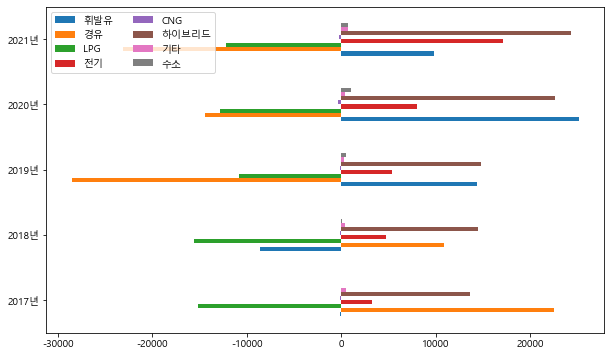

In [370]:
#시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

df3.T.plot(kind='barh',figsize=(10,6))

plt.legend(ncol=2)

<AxesSubplot:>

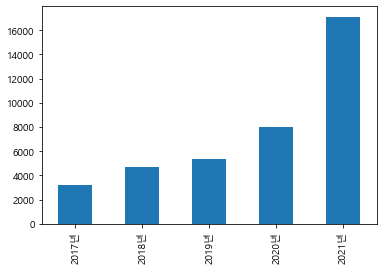

In [233]:
df3.iloc[3].plot(kind='bar') # 전기차

<AxesSubplot:ylabel='연료별'>

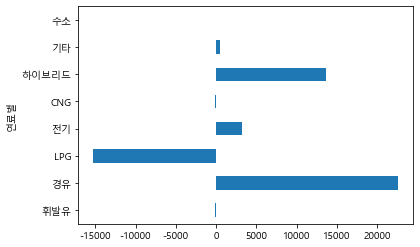

In [307]:
df3.T.loc["2017년"].plot(kind='barh')

<AxesSubplot:>

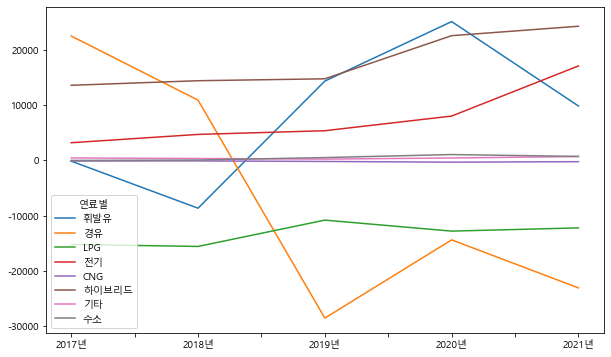

In [234]:
df3.T.plot(kind='line',figsize=(10,6))

<AxesSubplot:>

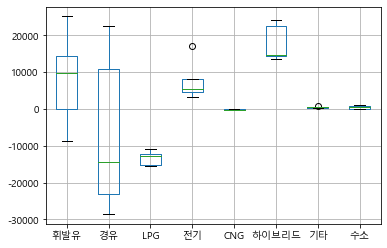

In [400]:
df3.T.boxplot()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

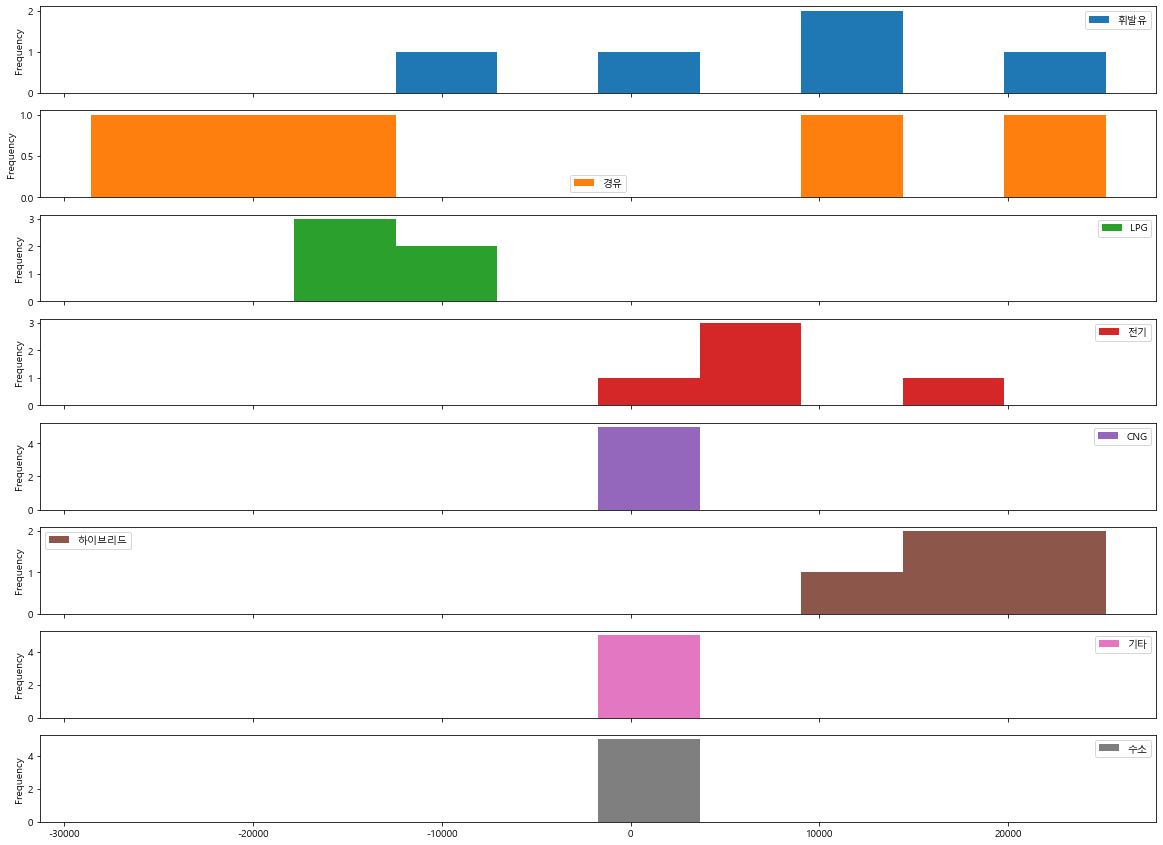

In [411]:
df3.T.plot.hist(subplots=True, figsize=(20,15))

In [235]:
df4 = df3.T.unstack()
df4

연료별         
휘발유    2017년     -128.0
       2018년    -8652.0
       2019년    14375.0
       2020년    25158.0
       2021년     9860.0
경유     2017년    22541.0
       2018년    10928.0
       2019년   -28563.0
       2020년   -14394.0
       2021년   -23094.0
LPG    2017년   -15224.0
       2018년   -15583.0
       2019년   -10812.0
       2020년   -12806.0
       2021년   -12221.0
전기     2017년     3208.0
       2018년     4713.0
       2019년     5381.0
       2020년     8040.0
       2021년    17123.0
CNG    2017년     -108.0
       2018년      -87.0
       2019년     -186.0
       2020년     -315.0
       2021년     -225.0
하이브리드  2017년    13613.0
       2018년    14443.0
       2019년    14787.0
       2020년    22604.0
       2021년    24311.0
기타     2017년      450.0
       2018년      349.0
       2019년      238.0
       2020년      440.0
       2021년      711.0
수소     2017년        1.0
       2018년       71.0
       2019년      517.0
       2020년     1068.0
       2021년      726.0
dtype: float64

In [377]:
df4.reset_index(level=1)

,level_1,0
연료별,,
휘발유,2017년,-128.0
휘발유,2018년,-8652.0
휘발유,2019년,14375.0
휘발유,2020년,25158.0
휘발유,2021년,9860.0
경유,2017년,22541.0
경유,2018년,10928.0
경유,2019년,-28563.0
경유,2020년,-14394.0


<AxesSubplot:>

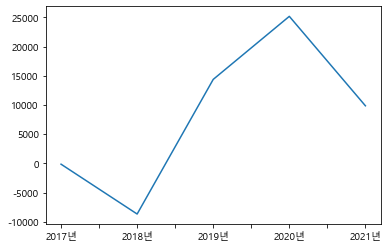

In [282]:
df4["휘발유"].T.plot(kind='line')

<AxesSubplot:xlabel='연료별,None'>

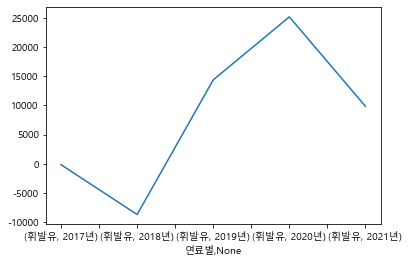

In [311]:
df4.iloc[:5].plot() # 휘발유

<AxesSubplot:xlabel='연료별,None'>

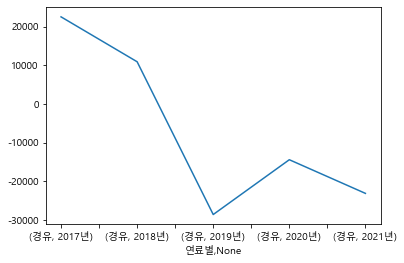

In [313]:
df4.iloc[5:10].plot() # 경유

<AxesSubplot:xlabel='연료별,None'>

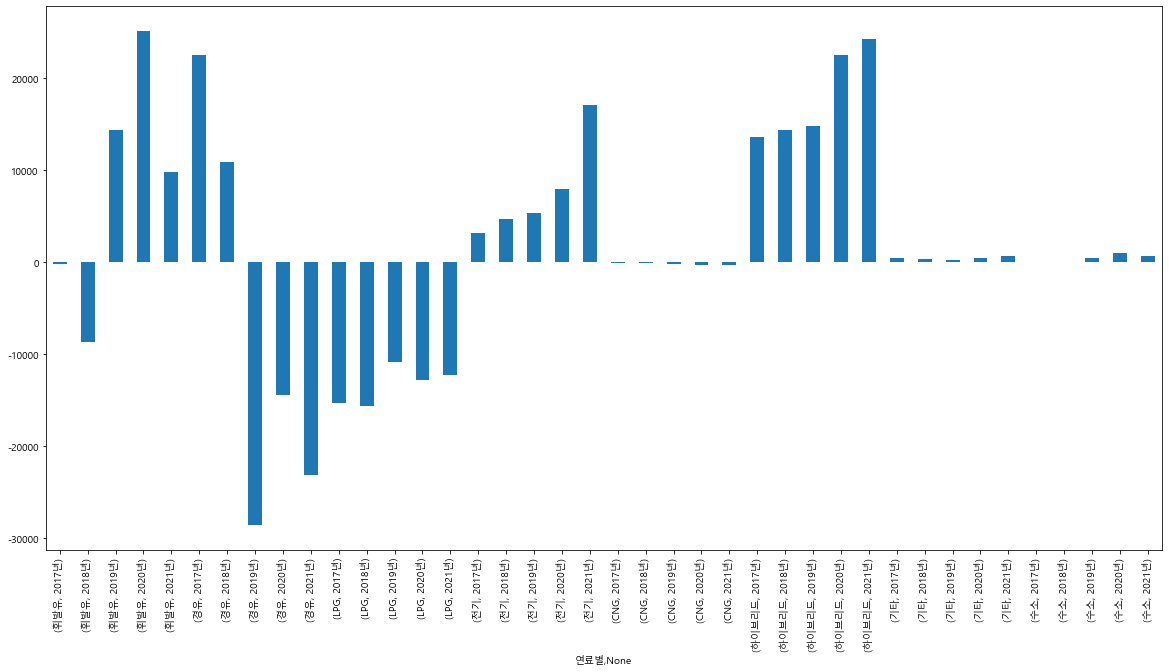

In [316]:
df4.iloc[:].plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

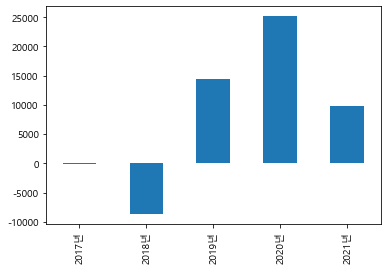

In [416]:
df4.loc["휘발유"].plot(kind='bar', stacked=True)